# Exploratory Data Analysis (Cleaned Data)

This notebook explores the cleaned Kepler Exoplanet dataset to:
- Understand feature distributions
- Compare features across target classes
- Identify informative predictors
- Detect potential outliers and scaling issues

All analysis is performed on the cleaned, model-ready dataset.

## Section 1 - Import Required Libraries

Libraries for data analysis and visualization are imported below.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [2]:
DATA_PATH = "../data/processed/cleaned_data.csv"

df = pd.read_csv(DATA_PATH)

print("Cleaned dataset shape:", df.shape)
df.head()

Cleaned dataset shape: (9564, 40)


,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag,koi_disposition
0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,15.347,1
1,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,15.347,1
2,0.000,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,15.436,2
3,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,15.597,2
4,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,15.509,1


## Section 2 - Target Variable Overview

We inspect the distribution of the encoded target variable to confirm class balance after preprocessing.

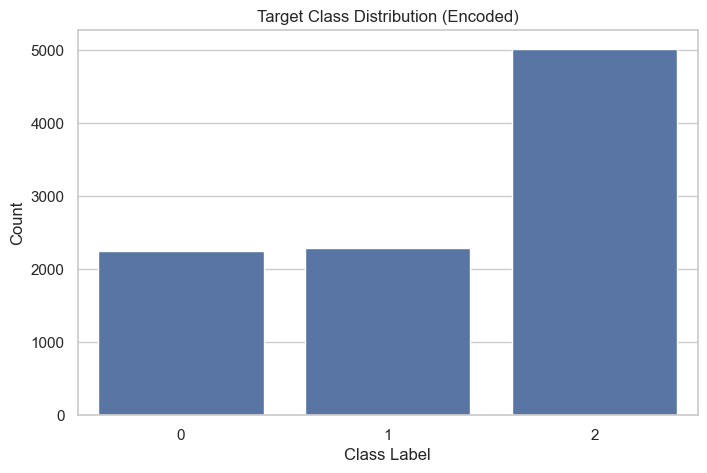

In [3]:
# Target column
target_column = "koi_disposition"

# Count encoded classes
df[target_column].value_counts()

# Plot target distribution
sns.countplot(x=target_column, data=df)
plt.title("Target Class Distribution (Encoded)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

## Target Class Distribution Interpretation

The encoded target distribution shows a clear class imbalance, with Class 2 containing the largest number of samples, while Classes 0 and 1 have substantially fewer observations. This imbalance reflects the real characteristics of exoplanet surveys, where false positives are more common than confirmed or candidate planets. As a result, accuracy alone will be insufficient for model evaluation, and metrics such as precision, recall, and F1-score will be more appropriate in subsequent modeling stages.

In [4]:
# Summary statistics for all features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
koi_score,9564.0,0.457647,0.440921,0.000000e+00,0.000000,0.334000,0.995000,1.000000e+00
koi_fpflag_nt,9564.0,0.188206,0.390897,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_ss,9564.0,0.231598,0.421875,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_co,9564.0,0.194898,0.396143,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_ec,9564.0,0.120033,0.325018,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_period,9564.0,75.671358,1334.744046,2.418425e-01,2.733684,9.752831,40.715178,1.299958e+05
koi_period_err1,9564.0,0.002048,0.008051,0.000000e+00,0.000006,0.000035,0.000245,1.725000e-01
koi_period_err2,9564.0,-0.002048,0.008051,-1.725000e-01,-0.000245,-0.000035,-0.000006,0.000000e+00
koi_time0bk,9564.0,166.183251,67.918960,1.205159e+02,132.761718,137.224595,170.694603,1.472522e+03
koi_time0bk_err1,9564.0,0.009657,0.022576,8.700000e-06,0.001338,0.004130,0.010000,5.690000e-01


## Section 3 - Feature Distributions

We examine distributions of selected key features to understand scale, skewness, and outliers.

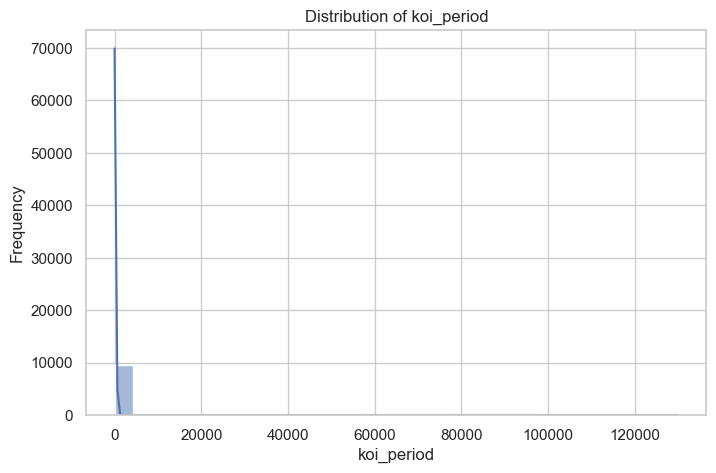

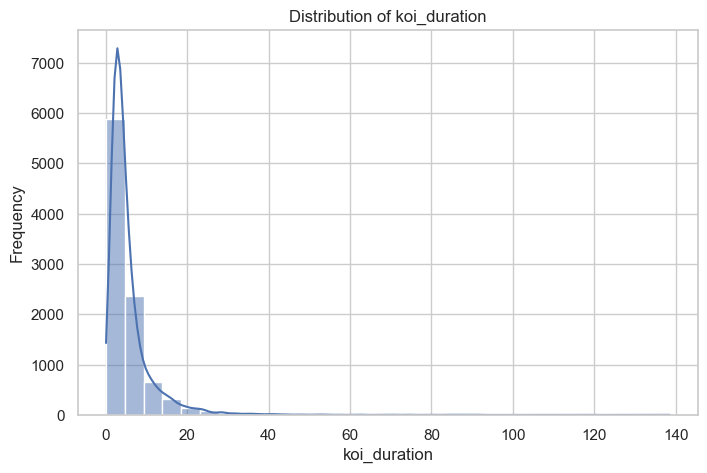

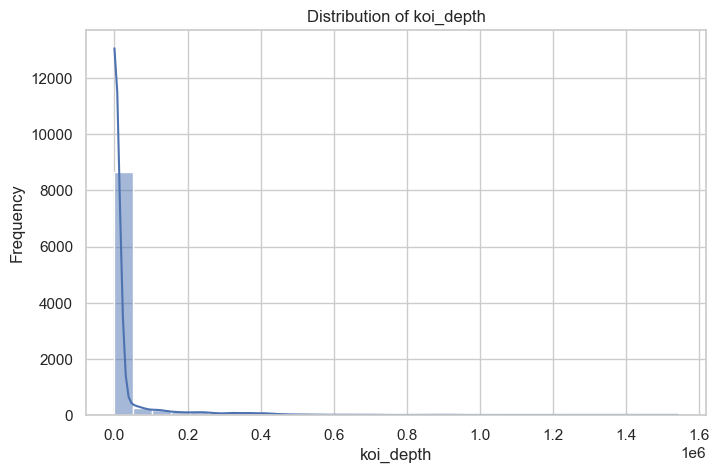

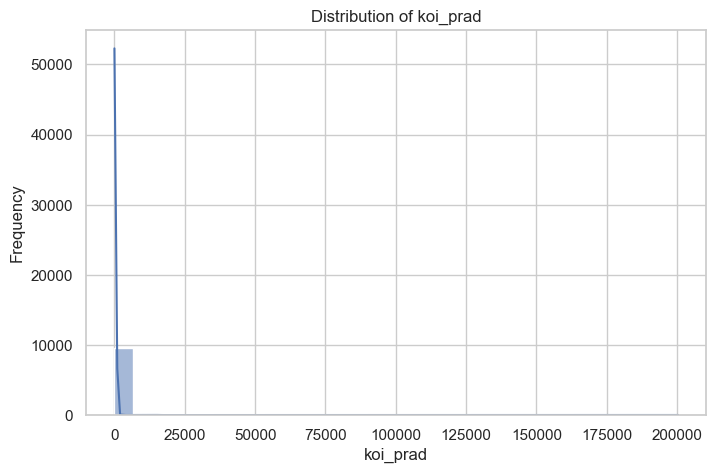

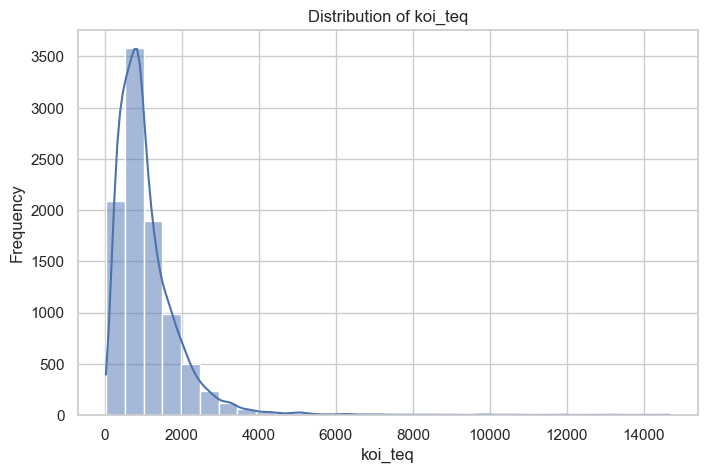

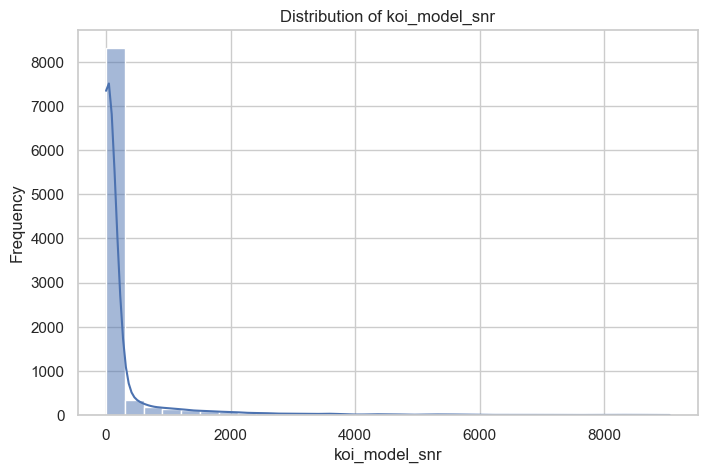

In [5]:
# Select representative features for inspection
key_features = [
    "koi_period",
    "koi_duration",
    "koi_depth",
    "koi_prad",
    "koi_teq",
    "koi_model_snr"
]

# Keep only features that exist
key_features = [f for f in key_features if f in df.columns]

# Plot distributions
for feature in key_features:
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

## Feature Distribution Interpretations

**koi_period:**  
The orbital period distribution is highly right-skewed, with most candidates having short periods and a small number exhibiting extremely long periods. This reflects detection bias in transit surveys and suggests that scaling or logarithmic transformation may be beneficial for certain models.

**koi_duration:**  
Transit durations are concentrated at lower values with a long right tail, indicating that most detected transits are relatively brief. The presence of outliers suggests that normalization may be required prior to modeling.

**koi_depth:**  
Transit depth shows extreme right-skewness, with most values clustered near zero and a few very deep events. Deeper transits are often associated with stellar eclipses or large bodies, making this feature important for identifying false positives.

**koi_prad:**  
Planetary radius values are heavily skewed toward smaller sizes, with a limited number of very large outliers. These large-radius cases may correspond to gas giants or non-planetary events, providing strong discriminatory power.

**koi_teq:**  
Equilibrium temperature displays moderate right-skewness, with most candidates at lower temperatures and fewer extreme values. This feature captures variation in orbital and stellar properties and adds useful physical context.

**koi_model_snr:**  
Signal-to-noise ratio values are concentrated at lower levels with a long tail of high-confidence detections. Higher SNR generally corresponds to more reliable transit signals, making this a strong indicator of candidate quality.

## Section 4 - Feature Comparison Across Classes

This section compares how key features differ between disposition classes.

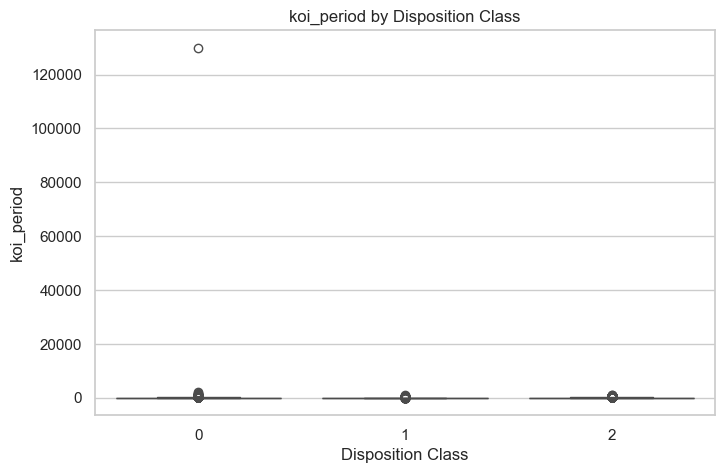

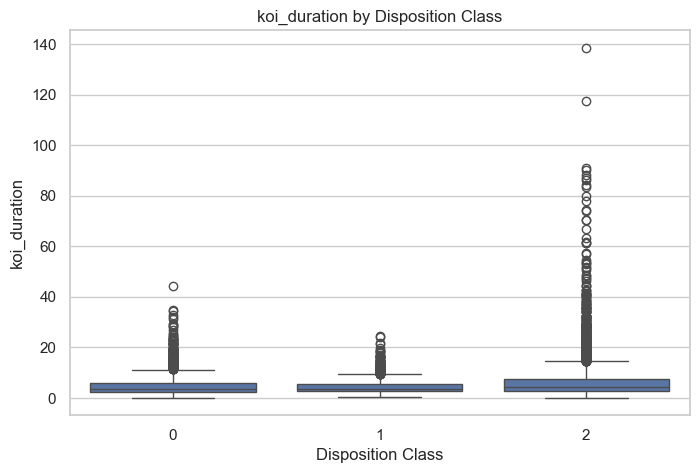

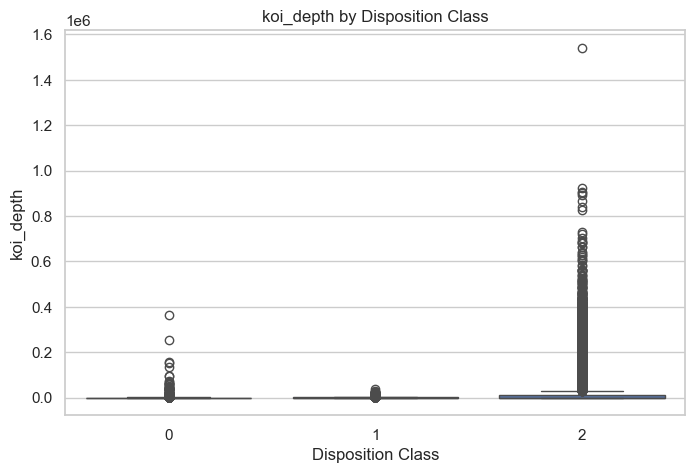

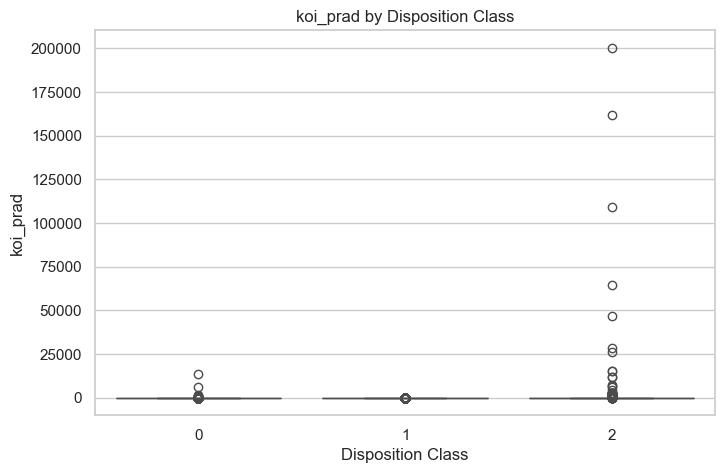

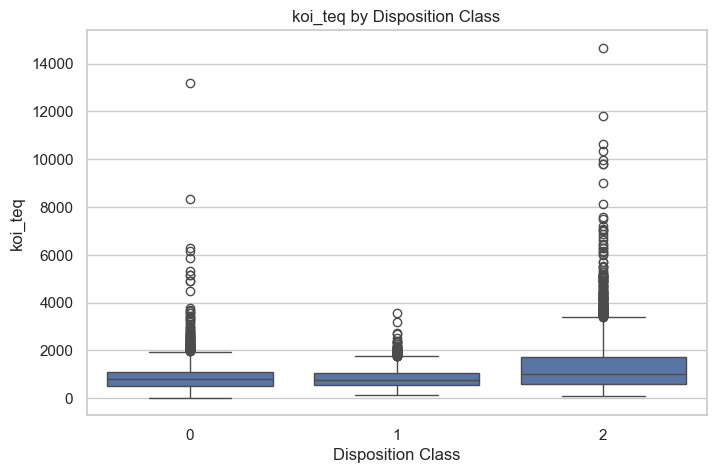

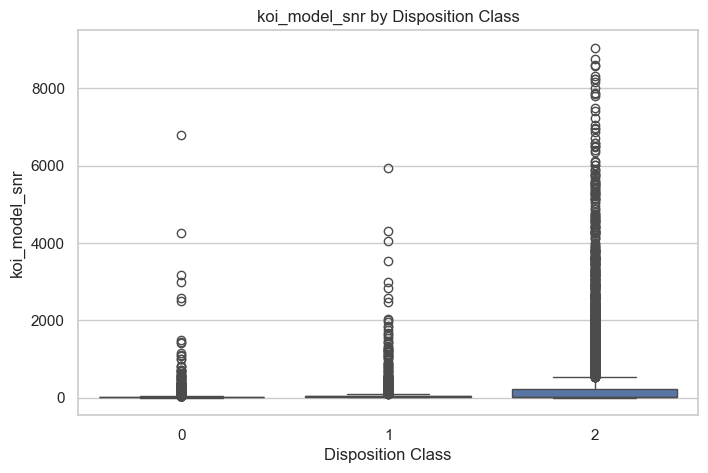

In [6]:
for feature in key_features:
    sns.boxplot(x=target_column, y=feature, data=df)
    plt.title(f"{feature} by Disposition Class")
    plt.xlabel("Disposition Class")
    plt.ylabel(feature)
    plt.show()

## Class-Conditional Feature Interpretation

**koi_period:**  
Across all disposition classes, orbital period shows substantial overlap, with extreme long-period outliers appearing primarily in one class. This suggests that period alone is not a strong discriminator, but extreme values may still contribute when combined with other features.

**koi_duration:**  
Transit duration exhibits noticeable differences across classes, with Class 2 showing a wider spread and more high-duration outliers. Longer and more variable durations are often associated with non-planetary events, indicating moderate discriminative value.

**koi_depth:**  
Transit depth shows clear separation, with Class 2 displaying significantly larger and more variable depths. Deep transits are commonly linked to eclipsing binaries or stellar contamination, making this feature highly informative for identifying false positives.

**koi_prad:**  
Planetary radius demonstrates strong class-dependent behavior, with extremely large values concentrated in Class 2. These outliers likely correspond to non-planetary or misclassified events, making this one of the most discriminative features in the dataset.

**koi_teq:**  
Equilibrium temperature varies across classes, with Class 2 showing higher median values and a broader distribution. This reflects differences in orbital configurations and stellar environments and provides supportive, though not standalone, discriminative power.

**koi_model_snr:**  
Signal-to-noise ratio shows the clearest separation between classes, with Class 2 containing many high-SNR detections. Higher SNR values generally correspond to stronger, more reliable signals, making this feature a critical indicator for classification performance.

## Section 5 - Correlation Analysis

We analyze correlations to identify redundant features and relationships that may affect modeling.

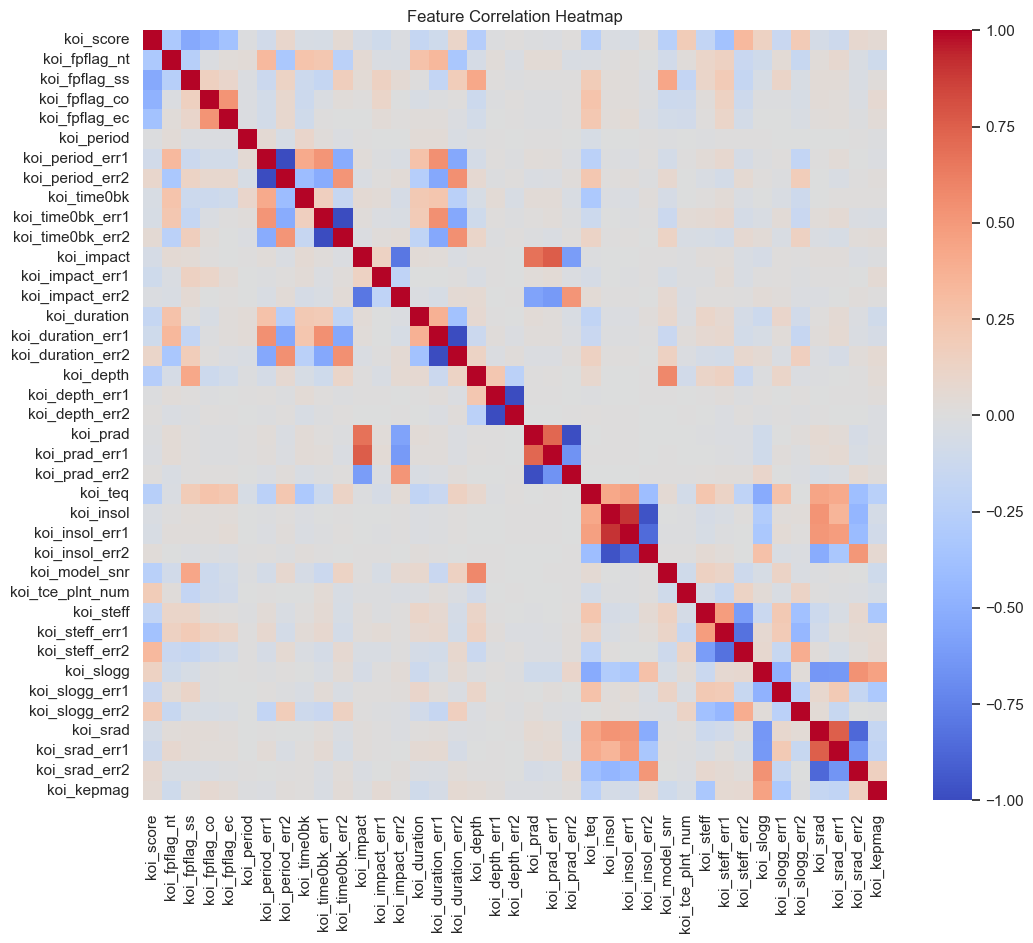

In [7]:
# Compute correlation matrix (exclude target)
corr_matrix = df.drop(columns=[target_column]).corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    cbar=True
)
plt.title("Feature Correlation Heatmap")
plt.show()

## Feature Correlation Interpretation

The correlation heatmap highlights strong relationships between physical measurements and their corresponding uncertainty terms, which is expected due to their shared estimation process. Moderate correlations are also observed among stellar properties, while most transit features remain weakly correlated. This suggests that some uncertainty features may be redundant, but core physical measurements provide complementary information for modeling.

## Section 6 - Outlier Inspection

Boxplots are used to identify extreme values that may require scaling or transformation.

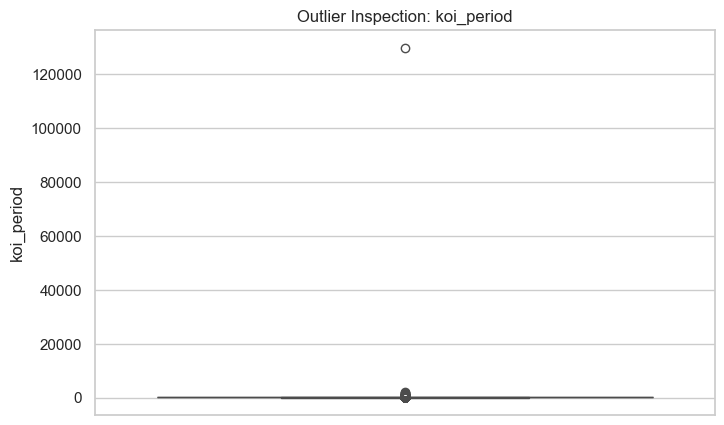

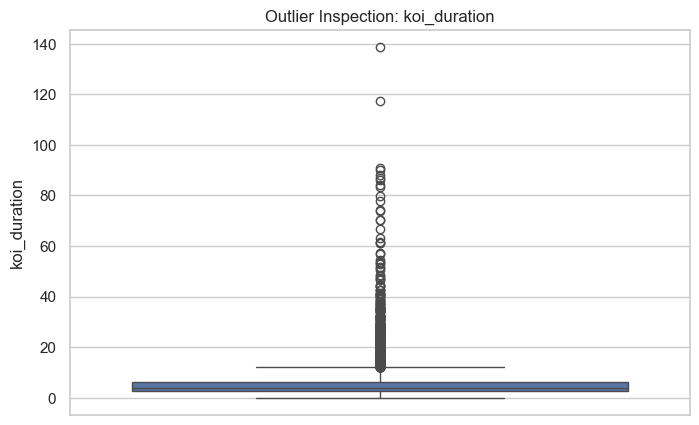

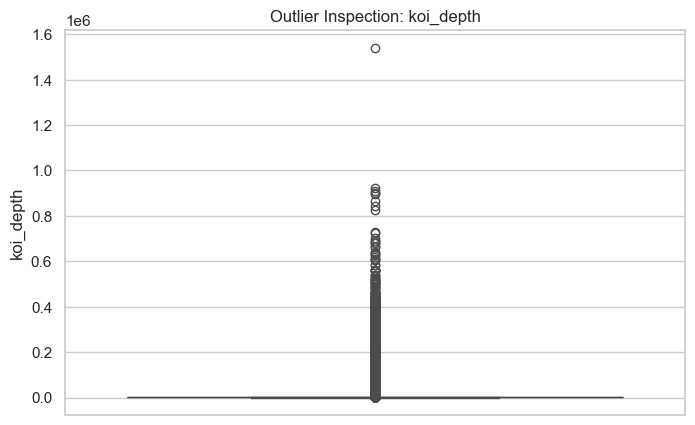

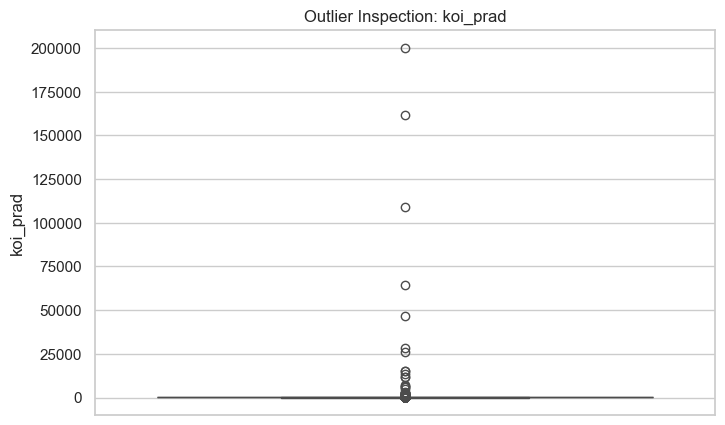

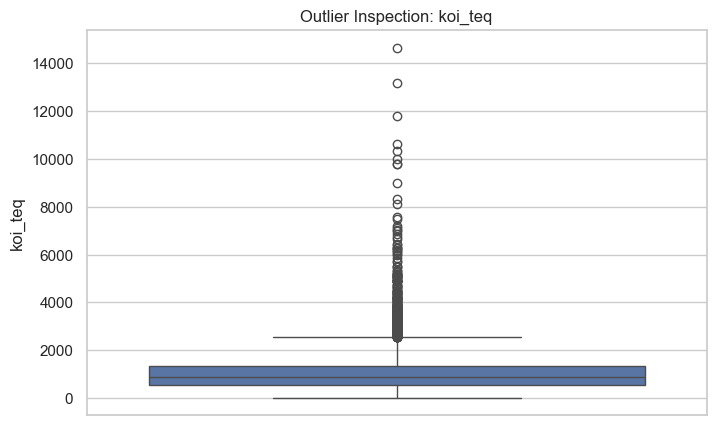

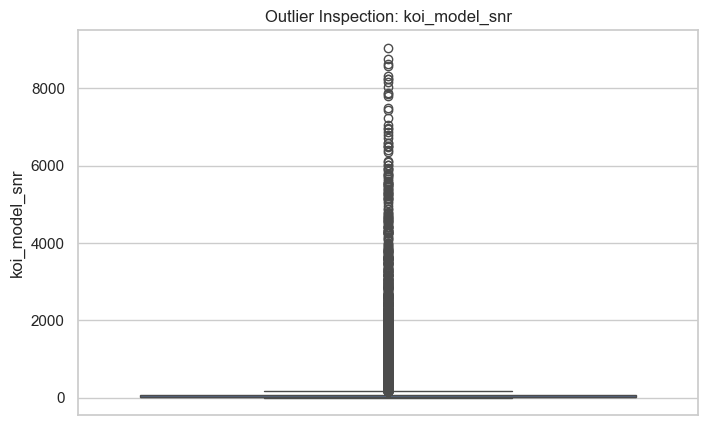

In [8]:
for feature in key_features:
    sns.boxplot(y=df[feature])
    plt.title(f"Outlier Inspection: {feature}")
    plt.ylabel(feature)
    plt.show()

## Outlier Inspection Interpretation

All inspected features exhibit significant outliers, typically concentrated in the upper ranges of their distributions. These extreme values are expected in astrophysical survey data and often correspond to rare orbital configurations, large bodies, stellar eclipses, or high-confidence detections. While these outliers may distort scale-sensitive models, they contain important physical information and should not be removed blindly. Instead, appropriate scaling or transformation strategies should be applied during modeling to manage their influence.